In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev_test.tsv
/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_train.tsv
/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev.tsv


In [2]:
train=pd.read_csv('/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_train.tsv',sep='\t')
test=pd.read_csv('/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev_test.tsv',sep='\t')
dev=pd.read_csv('/kaggle/input/checkworthiness/checkworthiness/CT22_arabic_1A_checkworthy_dev.tsv',sep='\t')

In [3]:
print(len(train),len(test),len(dev))

2513 691 235


In [4]:
dev.head()

,topic,tweet_id,tweet_url,tweet_text,class_label
0,COVID-19,1366750293535444997,http://twitter.com/user/status/136675029353544...,الصحة: من تلقى لقاح كورونا وتجاوز بعد استكمال ...,1
1,COVID-19,1296280796131721217,http://twitter.com/user/status/129628079613172...,تصريح صادم من «الصحة العالمية»: لا يوجد لقاح ل...,1
2,COVID-19,1293111922326409216,http://twitter.com/user/status/129311192232640...,🔴بوتين يعلن عن تسجيل أول #لقاح ضد #فيروس_كورون...,1
3,COVID-19,1290288058617589761,http://twitter.com/user/status/129028805861758...,#روسيا تعد بتوفير ملايين الجرعات من لقاح #كورو...,0
4,COVID-19,1293172767261630464,http://twitter.com/user/status/129317276726163...,#روسيا #Russia تعلن الموافقة على اول لقاح لفير...,1


In [5]:
test.head()

,topic,tweet_id,tweet_url,tweet_text,class_label
0,COVID-19,1.294701e+18,http://twitter.com/user/status/129470128763696...,البروفيسورة سارة جيلبرت قائدة فريق العمل في لق...,0
1,COVID-19,1.295658e+18,http://twitter.com/user/status/129565789215520...,#الصين :اللقاح المضاد ل #فيروس_كورونا سيكون مت...,0
2,COVID-19,1.293537e+18,http://twitter.com/user/status/129353728218048...,وزير الصحة الروسى: تطعيم الأطباء بلقاح #كورونا...,1
3,COVID-19,1.292930e+18,http://twitter.com/user/status/129292970615784...,الرئيس الروسي يعلن عبر صفحته على الفسبوك انه س...,1
4,COVID-19,1.298759e+18,http://twitter.com/user/status/129875879324599...,"فاوتشي يحذر من ""سلبية"" التعجيل باستخدام لقاح ل...",0


In [6]:
train.head()

,topic,tweet_id,tweet_url,tweet_text,class_label
0,COVID-19,1.297845e+18,http://twitter.com/user/status/129784491603128...,الحكومة البرازيلية @jairbolsonaro توقع اتفاقية...,0
1,COVID-19,1.241050e+18,http://twitter.com/user/status/124105023091052...,غضب شعبي في قطر لتباطؤ الحكومة ضد فيروس كورونا...,1
2,COVID-19,1.367191e+18,http://twitter.com/user/status/136719122552314...,( نحن بطيئون ) اعطاء لقاح كورونا في السعوديه ن...,0
3,COVID-19,1.298319e+18,http://twitter.com/user/status/129831900213403...,فإن لم تفلح كل المحاولات في ايجاد علاج او لقاح...,1
4,COVID-19,1.293136e+18,http://twitter.com/user/status/129313552259289...,أعلن #الرئيس_الروسي #فلاديمير_بوتين، اليوم، أن...,0


In [7]:
train.drop(['tweet_url'],axis=1,inplace=True)
test.drop(['tweet_url'],axis=1,inplace=True)
dev.drop(['tweet_url'],axis=1,inplace=True)

In [8]:
train[train.isnull().any(axis=1)].head()

,topic,tweet_id,tweet_text,class_label


In [9]:
test[test.isnull().any(axis=1)].head()

,topic,tweet_id,tweet_text,class_label


In [10]:
dev[dev.isnull().any(axis=1)].head()

,topic,tweet_id,tweet_text,class_label


<AxesSubplot:xlabel='class_label', ylabel='count'>

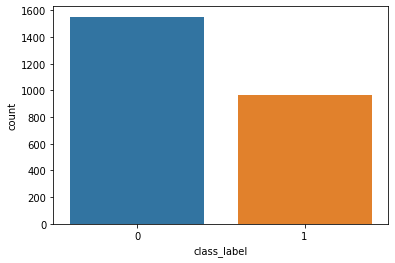

In [11]:
import seaborn as sns
sns.countplot(x='class_label', data=train)

Data preprocessing

In [12]:
!pip install pyarabic
!pip install farasapy
!pip install tashaphyne

     |████████████████████████████████| 251 kB 922 kB/s            


In [13]:
from nltk.corpus import stopwords
from textblob import TextBlob
import re
from tashaphyne.stemming import ArabicLightStemmer
from nltk.stem.isri import ISRIStemmer
import tashaphyne.arabic_const as arabconst 
import pyarabic.araby as araby

In [14]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
ArListem = ArabicLightStemmer()


In [15]:
def stem(text):
    zen = TextBlob(text)
    words = zen.words
    cleaned = list()
    for w in words:
        ArListem.light_stem(w)
        cleaned.append(ArListem.get_root())
    return " ".join(cleaned)


In [16]:
def normalizeArabic(text):
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

In [17]:
def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])

In [18]:
def remove_alphas(text):
    # Removes any link in the text
      text = re.sub('_', ' ', text)
      text = re.sub('،', '', text)
      text = re.sub('[A-Za-z0-9]','',text)
      return text

In [19]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [20]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [21]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [22]:
data=pd.concat([train,dev,test])

In [23]:
data['tweet_text'] = data['tweet_text'].astype("string")

In [24]:
test3=data['tweet_text'][4]
test4=data['tweet_text'][1]
print(test3)
print(test4)

4    أعلن #الرئيس_الروسي #فلاديمير_بوتين، اليوم، أن...
4    #روسيا #Russia تعلن الموافقة على اول لقاح لفير...
4    فاوتشي يحذر من "سلبية" التعجيل باستخدام لقاح ل...
Name: tweet_text, dtype: string
1    غضب شعبي في قطر لتباطؤ الحكومة ضد فيروس كورونا...
1    تصريح صادم من «الصحة العالمية»: لا يوجد لقاح ل...
1    #الصين :اللقاح المضاد ل #فيروس_كورونا سيكون مت...
Name: tweet_text, dtype: string


In [25]:
#data['tweet_text'] = data['tweet_text'].apply(lambda x:remove_alphas(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:remove_stop_words(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:normalizeArabic(x))
#data['tweet_text'] = data['tweet_text'].apply(lambda x:stem(x))

In [26]:
!git clone https://github.com/aub-mind/arabert


Cloning into 'arabert'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 564 (delta 188), reused 247 (delta 92), pack-reused 214
Receiving objects: 100% (564/564), 9.16 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [27]:
from arabert.preprocess import ArabertPreprocessor

model_name="aubmindlab/bert-base-arabertv01"
arabert_prep = ArabertPreprocessor(model_name=model_name)

#data['tweet_text'] = data['tweet_text'].apply(lambda x:arabert_prep.preprocess(x))

In [28]:
test3=data['tweet_text'][4]
test4=data['tweet_text'][1]
print(test4)


1    غضب شعبي في قطر لتباطؤ الحكومة ضد فيروس كورونا...
1    تصريح صادم من «الصحة العالمية»: لا يوجد لقاح ل...
1    #الصين :اللقاح المضاد ل #فيروس_كورونا سيكون مت...
Name: tweet_text, dtype: string


In [29]:
from sklearn.model_selection import train_test_split
X = data.tweet_text.values
y = data.class_label.values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1,shuffle=True, random_state=42)

In [31]:
#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [32]:
tokenizer = BertTokenizerFast.from_pretrained('asafaya/bert-base-arabic')
tokenizer2 = BertTokenizerFast.from_pretrained('aubmindlab/bert-base-arabertv01')



Downloading:   0%|          | 0.00/326k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/491 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/762k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.57M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/379 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/576 [00:00<?, ?B/s]

In [33]:
token_lens_test = []

for txt in data['tweet_text'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    
max_len=np.max(token_lens_test)

In [34]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")


MAX TOKENIZED SENTENCE LENGTH: 173


In [35]:
MAX_LEN=175

In [36]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            pad_to_max_length = True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [37]:
def tokenize2(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer2.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            pad_to_max_length = True,
            return_attention_mask=True,
            truncation=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [38]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

train_input_ids2, train_attention_masks2 = tokenize2(X_train, MAX_LEN)
val_input_ids2, val_attention_masks2 = tokenize2(X_val, MAX_LEN)
test_input_ids2, test_attention_masks2 = tokenize2(X_test, MAX_LEN)

In [39]:
bert_model = TFBertModel.from_pretrained('asafaya/bert-base-arabic')
bert_model2 = TFBertModel.from_pretrained('aubmindlab/bert-base-arabertv01')


Downloading:   0%|          | 0.00/520M [00:00<?, ?B/s]

2022-04-05 16:41:13.686950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 16:41:13.688050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 16:41:13.688750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-05 16:41:13.689648: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Downloading:   0%|          | 0.00/708M [00:00<?, ?B/s]

Some layers from the model checkpoint at aubmindlab/bert-base-arabertv01 were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at aubmindlab/bert-base-arabertv01.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [40]:
def create_model(bert_model,learning,max_len=MAX_LEN):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=learning)
    loss = 'binary_crossentropy'
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    embeddings = bert_model([input_ids,attention_masks])[1]
    x=tf.keras.layers.Dense(10, activation="relu")(embeddings)
    x=tf.keras.layers.Dropout(0.1)(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=['accuracy'])
    return model

In [41]:
model = create_model(bert_model,2e-5,MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 175)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 175)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 110617344   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 10)           7690        tf_bert_model[0][1]          

In [42]:
model2 = create_model(bert_model2,2e-5,MAX_LEN)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 175)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 175)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 135193344   input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 10)           7690        tf_bert_model_1[0][1]      

In [43]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard

tensorboard = TensorBoard(log_dir = 'logs')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', mode='auto',verbose=1)

2022-04-05 16:41:48.452382: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-05 16:41:48.452422: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-05 16:41:48.454556: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-04-05 16:41:48.959171: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-05 16:41:48.959370: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [44]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_val), epochs=10, batch_size=32,callbacks=[tensorboard,reduce_lr])

2022-04-05 16:41:49.355504: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
 1/78 [..............................] - ETA: 18:27 - loss: 0.7124 - accuracy: 0.5625

2022-04-05 16:42:04.176531: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-05 16:42:04.176590: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/78 [..............................] - ETA: 1:49 - loss: 0.6948 - accuracy: 0.5156 

2022-04-05 16:42:05.222831: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-04-05 16:42:05.226637: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-04-05 16:42:05.400223: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 2896 callback api events and 2893 activity events. 
2022-04-05 16:42:05.473413: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


78/78 [==============================] - 70s 724ms/step - loss: 0.6633 - accuracy: 0.6093 - val_loss: 0.6516 - val_accuracy: 0.5942
Epoch 2/10
78/78 [==============================] - 52s 668ms/step - loss: 0.6316 - accuracy: 0.6493 - val_loss: 0.6568 - val_accuracy: 0.6413
Epoch 3/10
78/78 [==============================] - 53s 674ms/step - loss: 0.5756 - accuracy: 0.6933 - val_loss: 0.6493 - val_accuracy: 0.6341
Epoch 4/10
78/78 [==============================] - 53s 677ms/step - loss: 0.4596 - accuracy: 0.7887 - val_loss: 0.6382 - val_accuracy: 0.6667
Epoch 5/10
78/78 [==============================] - 53s 675ms/step - loss: 0.3066 - accuracy: 0.8776 - val_loss: 0.7594 - val_accuracy: 0.6920
Epoch 6/10
78/78 [==============================] - 53s 675ms/step - loss: 0.1910 - accuracy: 0.9325 - val_loss: 0.9638 - val_accuracy: 0.6775
Epoch 7/10
78/78 [==============================] - 53s 677ms/step - loss: 0.1387 - accuracy: 0.9535 - val_loss: 1.0995 - val_accuracy: 0.6739
Epoch 8/10

In [45]:
result_bert = model.predict([test_input_ids,test_attention_masks])


In [46]:
history_bert2 = model2.fit([train_input_ids2,train_attention_masks2], y_train, validation_data=([val_input_ids2,val_attention_masks2], y_val), epochs=10, batch_size=32,callbacks=[tensorboard,reduce_lr])

Epoch 1/10
 1/78 [..............................] - ETA: 18:48 - loss: 0.6874 - accuracy: 0.5938

2022-04-05 16:51:48.510966: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-05 16:51:48.511022: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


 2/78 [..............................] - ETA: 1:47 - loss: 0.6514 - accuracy: 0.6406 

2022-04-05 16:51:50.714016: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-04-05 16:51:50.721586: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-04-05 16:51:50.894609: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 2896 callback api events and 2893 activity events. 
2022-04-05 16:51:50.981885: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


78/78 [==============================] - 72s 749ms/step - loss: 0.6786 - accuracy: 0.6012 - val_loss: 0.6542 - val_accuracy: 0.5906
Epoch 2/10
78/78 [==============================] - 53s 674ms/step - loss: 0.6371 - accuracy: 0.6384 - val_loss: 0.6660 - val_accuracy: 0.6087
Epoch 3/10
78/78 [==============================] - 53s 681ms/step - loss: 0.5536 - accuracy: 0.7123 - val_loss: 0.6198 - val_accuracy: 0.6486
Epoch 4/10
78/78 [==============================] - 53s 681ms/step - loss: 0.4432 - accuracy: 0.7798 - val_loss: 0.6622 - val_accuracy: 0.6667
Epoch 5/10
78/78 [==============================] - 53s 681ms/step - loss: 0.3379 - accuracy: 0.8610 - val_loss: 0.7966 - val_accuracy: 0.6667
Epoch 6/10
78/78 [==============================] - 53s 681ms/step - loss: 0.1943 - accuracy: 0.9269 - val_loss: 0.9053 - val_accuracy: 0.6703
Epoch 7/10
78/78 [==============================] - 53s 674ms/step - loss: 0.1650 - accuracy: 0.9358 - val_loss: 1.0717 - val_accuracy: 0.6739
Epoch 8/10

In [47]:
result_bert2 = model2.predict([test_input_ids2,test_attention_masks2])


In [48]:
print(result_bert[1]*0.7+result_bert2[1]*0.3)

[0.00145415]


In [49]:
resultat=[]
for i in range(len(result_bert)):
    resultat.append(result_bert[i]*0.5+result_bert2[i]*0.5)

In [50]:
print(resultat[3])

[0.998584]


In [51]:
y_predicted=[]
for i in range(len(resultat)):
    if resultat[i]>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [52]:
#y_predicted = np.where(resultat> 0.5, 1, 0)
print(y_predicted)

[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 

In [53]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()


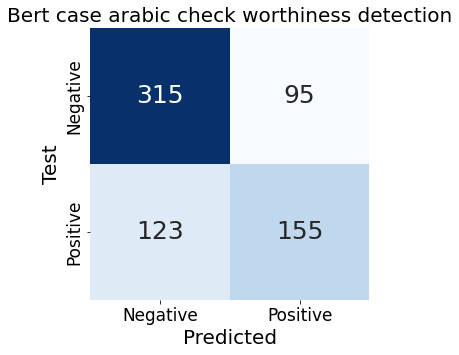

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix(y_test, y_predicted,'Bert case arabic check worthiness detection')

In [55]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_predicted)
print("Accuracy :%5f" % (accuracy))

Accuracy :0.683140


In [56]:
from sklearn.metrics import f1_score
mic=f1_score(y_test,y_predicted, average='micro')
print("F1-score micro :%5f" % (mic))

F1-score micro :0.683140


In [57]:
from sklearn.metrics import f1_score
mac=f1_score(y_test,y_predicted, average='macro')
print("F1-score macro :%5f" % (mac))

F1-score macro :0.665023


In [58]:
from sklearn.metrics import recall_score
rec=recall_score(y_test, y_predicted, average='binary')
print(rec)

0.5575539568345323


In [59]:
from sklearn.metrics import precision_score
prec=precision_score(y_test, y_predicted, average='binary')
print(prec)

0.62


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


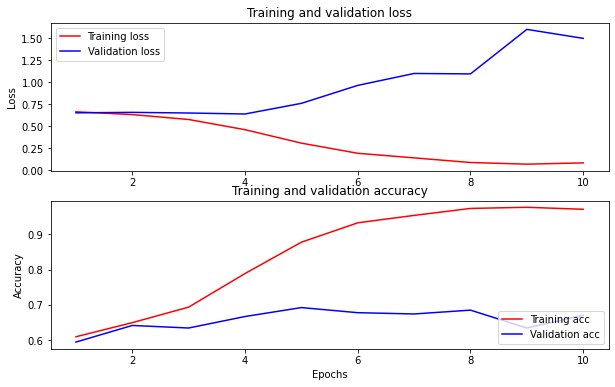

In [60]:
history_dict = history_bert.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [61]:
# Configuration
lr=2e-5
EPOCHS = 10
BATCH_SIZE = 32
MAX_LEN = 175

In [62]:
score = [{'MODEL': 'arabertv01', 'Accuracy': accuracy,'Precision':prec,'Recall':rec, 'f1-score micro':mic, 'f1-score macro':mac,'epochs':EPOCHS,'batch_size':BATCH_SIZE,'sequence length':MAX_LEN,'learning-rate':'2e-5','Preprocessing':1,'augmentation':0}]
score_f =pd.DataFrame(score)

In [63]:
score_f.to_csv("model_boosted_results.csv")